# BackGround

A credit card is one of the most used financial products to make online purchases and payments. Though the Credit cards can be a convenient way to manage your finances, they can also be risky. Credit card fraud is the unauthorized use of someone else's credit card or credit card information to make purchases or withdraw cash.
It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase. 


The dataset contains transactions made by credit cards in September 2013 by European cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.


We have to build a classification model to predict whether a transaction is fraudulent or not.






In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier  
from sklearn.metrics import confusion_matrix, roc_curve, precision_recall_curve,accuracy_score,precision_score
from sklearn.metrics import classification_report,recall_score,f1_score

In [2]:
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline

In [111]:
#Reading dataset
df = pd.read_csv(r'C:\Users\Vipin\Desktop\creditcard.csv')

In [112]:
df


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


# Exploratory data Analysis

Exploratory data analysis (EDA) is used by data scientists to analyze and investigate data sets and summarize their main characteristics, often employing data visualization methods. It helps determine how best to manipulate data sources to get the answers you need, making it easier for data scientists to discover patterns, spot anomalies, test a hypothesis, or check assumptions.

In [113]:
#Total number of rows and columns
df.shape

(284807, 31)

In [114]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.759061e-12,-8.251130e-13,-9.654937e-13,8.321385e-13,1.649999e-13,4.248366e-13,-3.054600e-13,8.777971e-14,-1.179749e-12,...,-3.405756e-13,-5.723197e-13,-9.725856e-13,1.464150e-12,-6.987102e-13,-5.617874e-13,3.332082e-12,-3.518874e-12,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [115]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [116]:
df.count()

Time      284807
V1        284807
V2        284807
V3        284807
V4        284807
V5        284807
V6        284807
V7        284807
V8        284807
V9        284807
V10       284807
V11       284807
V12       284807
V13       284807
V14       284807
V15       284807
V16       284807
V17       284807
V18       284807
V19       284807
V20       284807
V21       284807
V22       284807
V23       284807
V24       284807
V25       284807
V26       284807
V27       284807
V28       284807
Amount    284807
Class     284807
dtype: int64

In [117]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values


Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

There is no missing data in the entire dataset

In [121]:
# Determine number of fraud cases in dataset 
fraud = df[df['Class'] == 1] 
valid = df[df['Class'] == 0] 
outlierFraction = len(fraud)/float(len(valid)) 
print(outlierFraction) 
print('Fraud Cases: {}'.format(len(df[df['Class'] == 1]))) 
print('Valid Transactions: {}'.format(len(df[df['Class'] == 0]))) 

0.0017304750013189597
Fraud Cases: 492
Valid Transactions: 284315


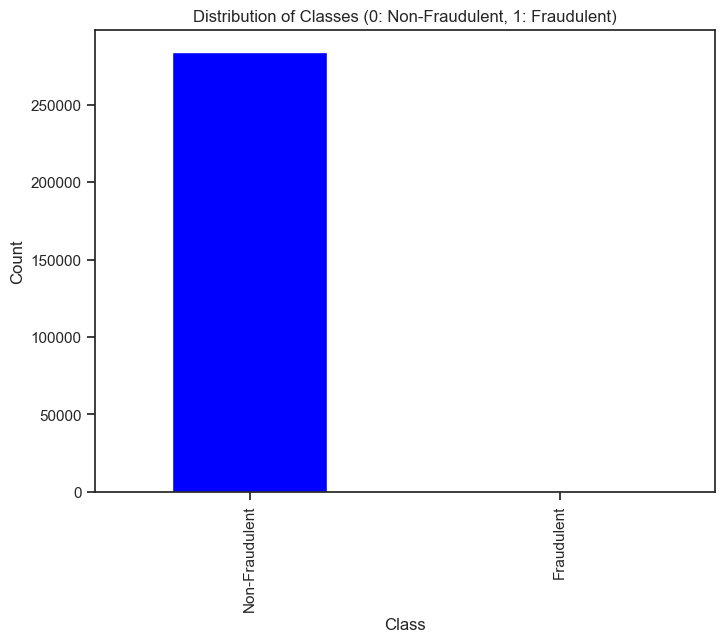

In [122]:
# Visualize the distribution of 'Class' (fraudulent vs. non-fraudulent transactions)
plt.figure(figsize=(8, 6))
df['Class'].value_counts().plot(kind='bar', color=['blue', 'red'])
plt.title('Distribution of Classes (0: Non-Fraudulent, 1: Fraudulent)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks([0,1], ['Non-Fraudulent','Fraudulent'])
plt.show()


Only 492 (or 0.172%) of transaction are fraudulent. That means the data is highly unbalanced with respect with target variable Class.


Text(0.5, 1.0, 'Distribution of Amount')

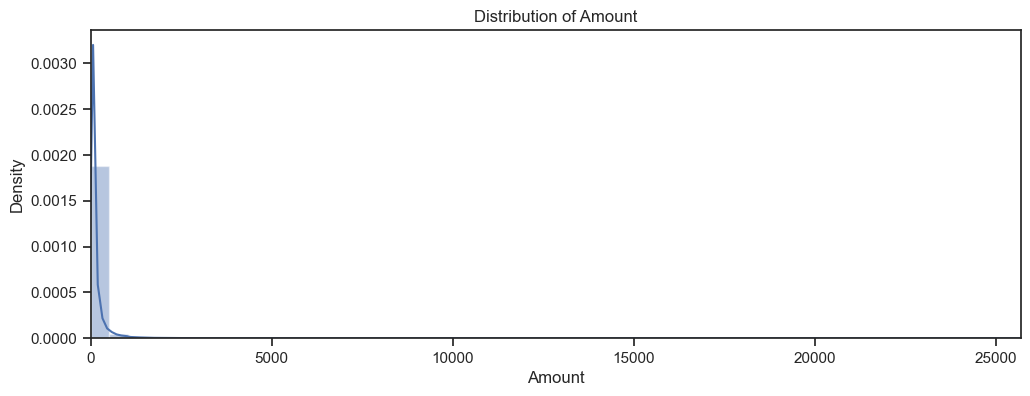

In [123]:
amount_val = df['Amount'].values
plt.figure(figsize = (12,4))
sns.distplot(df['Amount'])
plt.xlim(min(amount_val),max(amount_val))
plt.title("Distribution of Amount")

The amount variable is mostly dense around the smallar amount regions.

### Check for duplicates
duplicates = df.duplicated().sum()
print(f"\nNumber of Duplicates: {duplicates}")

In [13]:
#Deleting duplicate columns
df = df.drop_duplicates()
df.count()

Time      283726
V1        283726
V2        283726
V3        283726
V4        283726
V5        283726
V6        283726
V7        283726
V8        283726
V9        283726
V10       283726
V11       283726
V12       283726
V13       283726
V14       283726
V15       283726
V16       283726
V17       283726
V18       283726
V19       283726
V20       283726
V21       283726
V22       283726
V23       283726
V24       283726
V25       283726
V26       283726
V27       283726
V28       283726
Amount    283726
Class     283726
dtype: int64

### Getting the correct datatype for the date

While working with data in Pandas, it is not an unusual thing to encounter time series data. We cannot perform any time series-based operation on the dates if they are not in the right format. To be able to work with it, we are required to convert the dates into the correct format.

In [14]:

timedelta = pd.to_timedelta(df['Time'],unit='s')

df['Time_min'] = (timedelta.dt.components.minutes).astype(int)
df['Time_hour'] = (timedelta.dt.components.hours).astype(int)

Text(0.5, 1.0, 'Amounts by hours of Frauds and Normal Transactions')

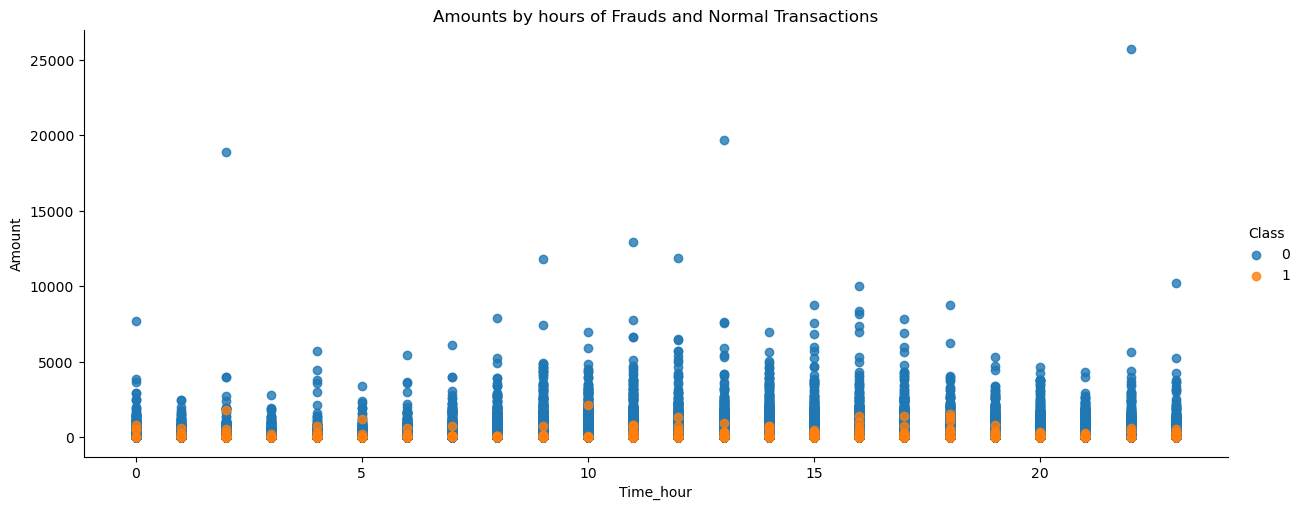

In [15]:
#amount vs time distribution
ax = sns.lmplot(y='Amount',x='Time_hour',fit_reg=False,aspect=2.5,data=df,hue='Class')
plt.title("Amounts by hours of Frauds and Normal Transactions",fontsize=12)


The pattern oberserved above about non-fraud and fraud transactions are much more uniform accorss the day.

#### Visualization using boxplot

One important part beyond simply pulling summary statistical methods is to get a visual sense of the distributions of various variables within a given Series or Series by category using boxplots.

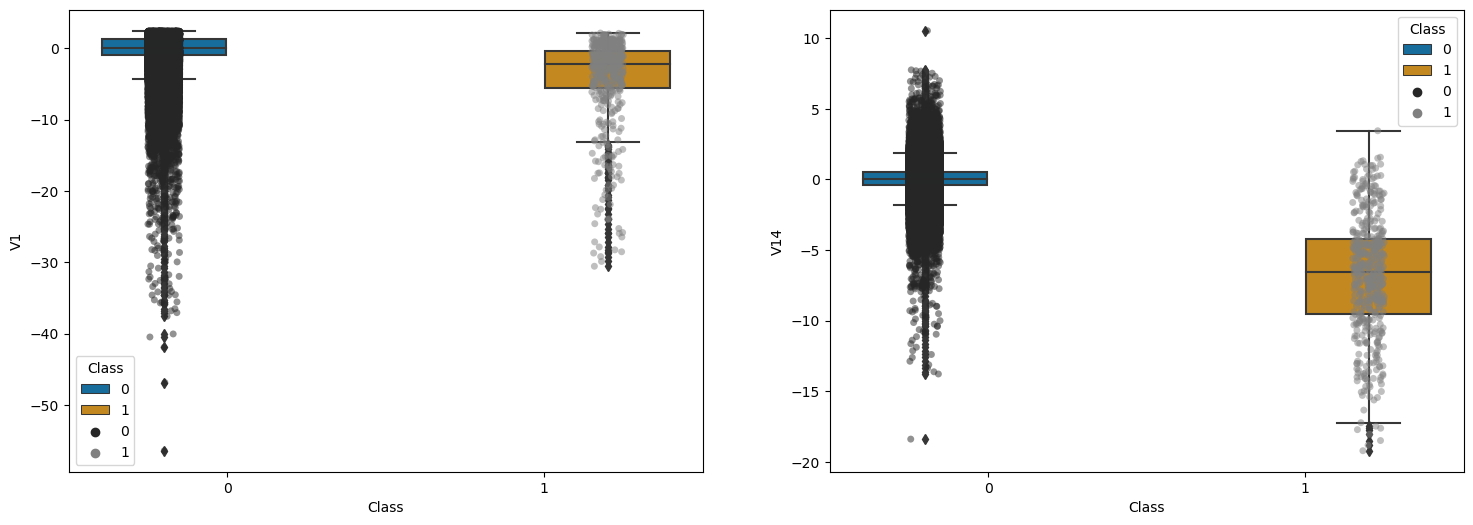

In [16]:
cols = ['V1', 'V14']
f, axes = plt.subplots(1, 2, figsize=(18, 6), sharex=True)
for index,col in enumerate(cols):
    sns.boxplot(x="Class", y=col, hue="Class", palette="colorblind", data=df, ax=axes[index]) 
    sns.stripplot(x='Class', y=col,  data=df,dodge=True,jitter=True,marker='o',ax=axes[index],alpha=0.5,color='grey',hue='Class')
plt.show()
plt.clf()
plt.close()

#### Visualisation using distribution plot

Distribution plots are used to visualize univariate distributions of observations

They can be used to identify outliers, identify how normal a dataset is, and whether there are potential gaps in your dataset, along with other applications.

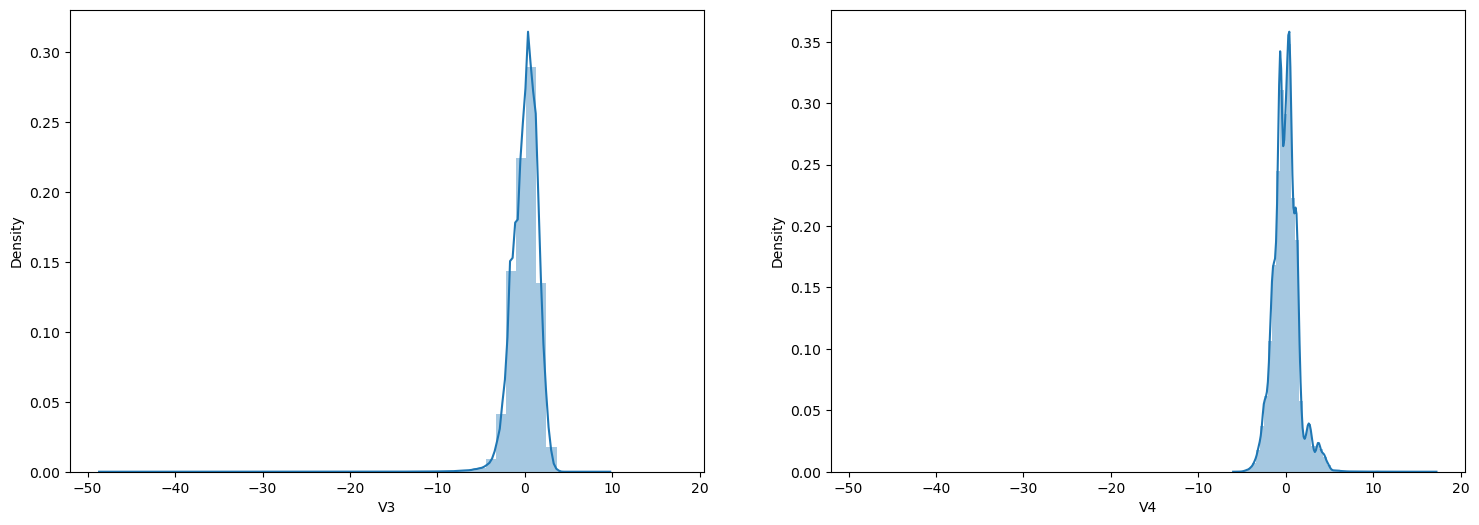

In [17]:
f, axes = plt.subplots(1, 2, figsize=(18, 6), sharex=True)
sns.distplot(df['V3'],ax=axes[0])
sns.distplot(df['V4'],ax=axes[1])

plt.show()
plt.clf()
plt.close()

#### Visualisation using Joint plot

While histograms are useful to view, they are still ostensively univatiate in nature, meaning they only show the distribution of one variable at a time.

When we want to compare two variables distributions at a time in Python, we can use the joint plot function.

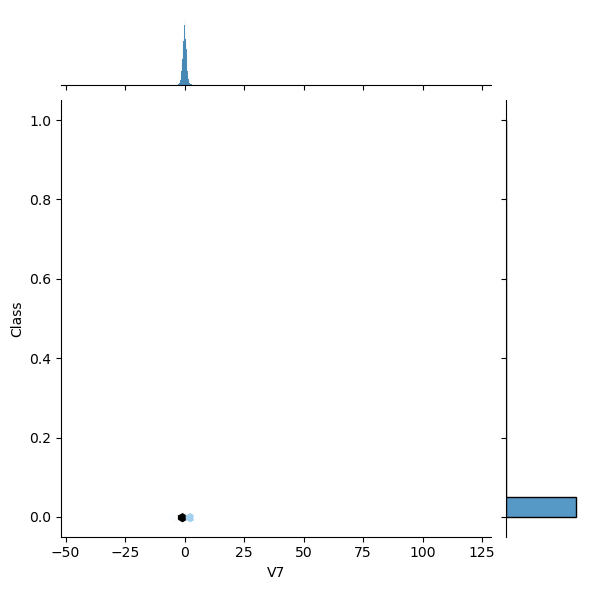

In [18]:
sns.jointplot(y='Class',x='V7',data=df,kind='hex')

#### Visualisation using scatter plot

Another common method of performing bivariate analysis, or comparing more than one variable, is to use scatter plots and pair plots.Scatter plots are useful to show individual values plot on a two dimensional cartesian X & Y plane from two Series in a Pandas DataFrame.



<Axes: xlabel='V9', ylabel='Class'>

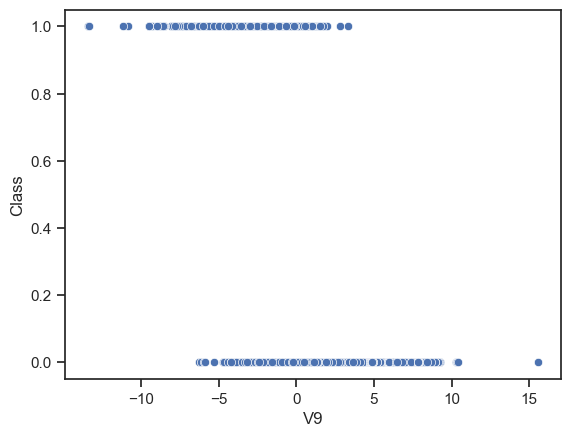

In [126]:
sns.scatterplot(x="V9", y="Class",data=df)

<Axes: xlabel='Class', ylabel='Amount'>

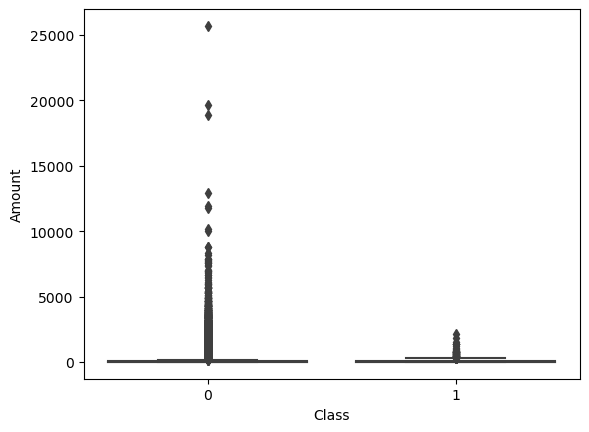

In [20]:
sns.boxplot(y="Amount", x="Class",data=df)

#### Visualisation using pair plot

Pair plots can play a similar role to individual scatter plots as they provide a variety of visualizations

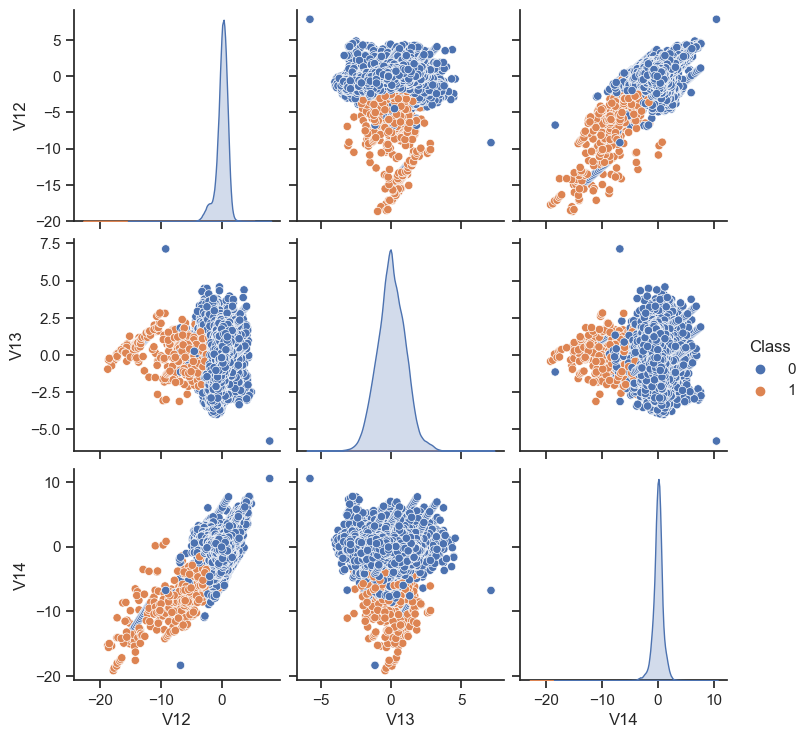

In [21]:
sns.set(style="ticks")
sns.pairplot(df[["V12","V13","V14","Class"]], hue="Class")

#### Correlation matrix

A correlation matrix is a common tool used to compare the coefficients of correlation between different features (or attributes) in a dataset. It allows us to visualize how much (or how little) correlation exists between different variables. This is an important step in pre-processing machine learning pipelines. Since the correlation matrix allows us to identify variables that have high degrees of correlation, they allow us to reduce the number of features we may have in a dataset. This is often referred to as dimensionality reduction and can be used to improve the runtime and effectiveness of our models.

<Axes: >

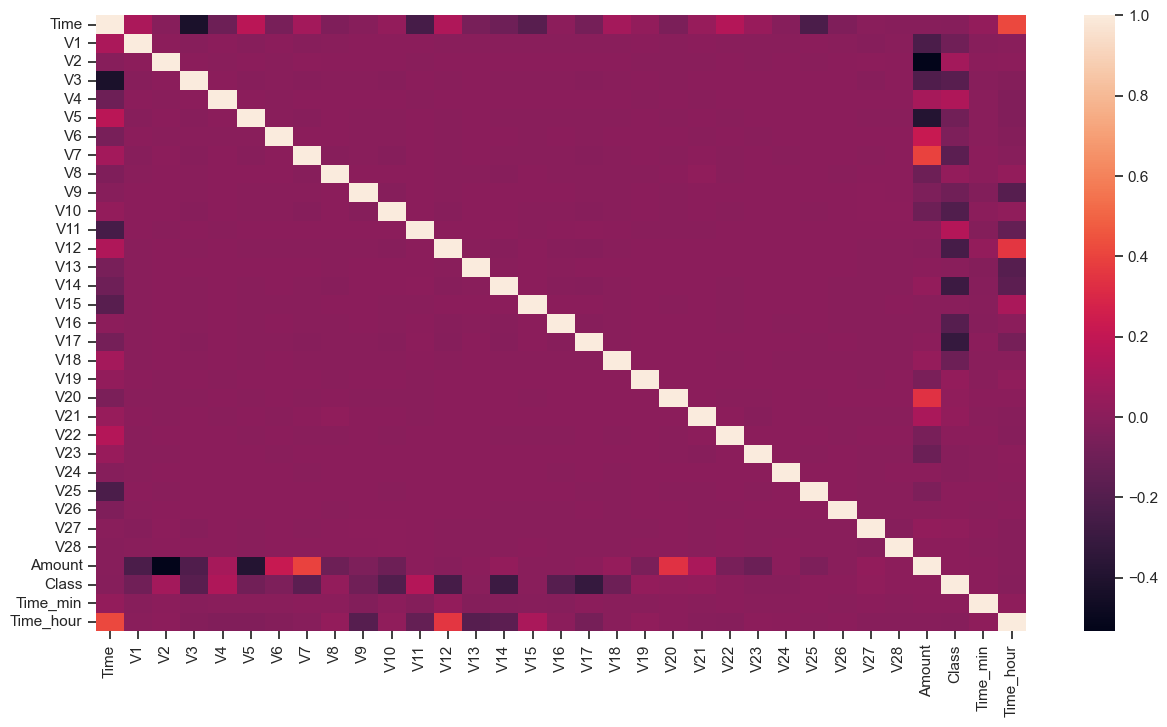

In [22]:
f, ax = plt.subplots(figsize=(15, 8))
corr = df.corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In the HeatMap we can clearly see that most of the features do not correlate to other features but there are some features that either has a positive or a negative correlation with each other. For example, V2 and V5 are highly negatively correlated with the feature called Amount. We also see some correlation with V20 and Amount. This gives us a deeper understanding of the Data available to us.

# Data Cleaning

#### Standardisation of dataset

It is better idea to scale the features before using the dataset so that all the values come in similar range. This is important so that features with lesser significance might not end up dominating the more significant features due to its larger range.

Different types of Scaling-Log, Standardization and Normalization is used. We’ll decide which of these to choose from depending on our dataset.

Log is a scaling technique which is done when the variables span several orders of magnitude.

Standardization is a scaling technique are the ones where the values are centered around the mean with a unit standard deviation. This means that the mean of the attribute becomes zero and the resultant distribution has a unit standard deviation.

Normalization (Min-Max Scaling) is a scaling technique in which values are shifted and are then rescaled so that they end up ranging between 0 and 1.

In [23]:
#Scale amount by Standardization
ss = StandardScaler()
df['amount_scaled'] = ss.fit_transform(df['Amount'].values.reshape(-1,1))

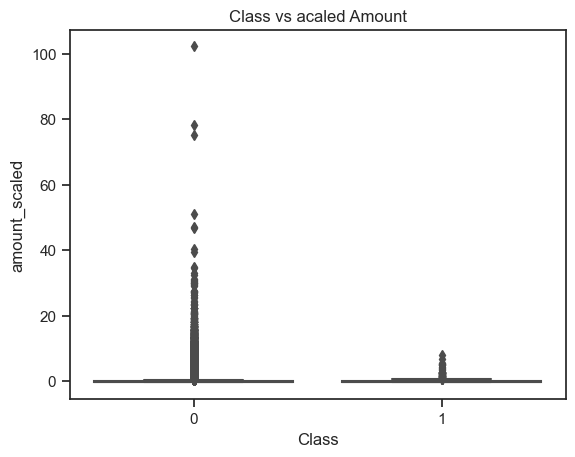

In [24]:
sns.boxplot(x ="Class",y="amount_scaled",data=df)
plt.title("Class vs acaled Amount")
plt.show()

### Train and Test Split

We will be dividing the dataset into two main groups. One for training the model and the other for Testing our trained model’s performance.

In [25]:
# Prepare features and target
# Using Scikit-learn to split data into training and testing sets 

X = df.drop(['Time','Class'], axis=1)
y = df['Class']

# Split the data into training and testing sets 
X_train, X_test, y_train, y_test = train_test_split( X,y, test_size = 0.2,stratify=df['Class']) 
print(X_train.shape,X_test.shape)

(226980, 32) (56746, 32)


In [26]:
#Inspect whether the 2 sets are indeed stratified.
print(pd.Series(y_train).value_counts(normalize = True))
print(pd.Series(y_test).value_counts(normalize = True))

Class
0    0.998335
1    0.001665
Name: proportion, dtype: float64
Class
0    0.998326
1    0.001674
Name: proportion, dtype: float64


#### Handling imbalanced data

As the dataset is an imbalanced dataset, we can’t just simply use it raw and proced it into machine learning. It could cause a biased to the majority of the class that leads to a poor machine learning model.

So, we have to handle the imbalanced dataset first.


SMOTE is a technique where you do over-sampling to the minority class by filling out the gap between each value and then do under-sampling for the majority class so it meets in the middle.



In [27]:
#Apply SMOTE to create synthetic observations from minority class

print("X_train: ",X_train.shape)
print("y_train: ",y_train.shape)
print("X_test: ",X_test.shape)
print("y_test: ",y_test.shape)

print('\n')
print('............')
print('\n')

from imblearn.over_sampling import SMOTE #Over sampling
smote= SMOTE()
X_train_smote,y_train_smote=smote.fit_resample(X, y)
X_test_smote, y_test_smote = X_test, y_test

print("X_train_smote: ",X_train_smote.shape)
print("y_train_smote: ",y_train_smote.shape)
print("X_test_smote: ",X_test_smote.shape)
print("y_test_smote: ",y_test_smote.shape)

X_train:  (226980, 32)
y_train:  (226980,)
X_test:  (56746, 32)
y_test:  (56746,)


............


X_train_smote:  (566506, 32)
y_train_smote:  (566506,)
X_test_smote:  (56746, 32)
y_test_smote:  (56746,)


# Feature Engineering

In [28]:
from sklearn.ensemble import RandomForestClassifier
rf =RandomForestClassifier (class_weight='balanced', random_state=123)
rf.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', random_state=123)

In [29]:
importances = rf.feature_importances_
sorted(importances)

[0.0038575818714379965,
 0.004326519478847288,
 0.004408249871770031,
 0.004513571521324208,
 0.004849971421047631,
 0.0048720979950856655,
 0.005516545062337318,
 0.0059121060232823226,
 0.006084059770170181,
 0.006413061793866755,
 0.006948095601693046,
 0.007802799476371553,
 0.008081214389686632,
 0.009458451707312687,
 0.009510057720656712,
 0.009548056392258057,
 0.01028645536142205,
 0.010856721479407845,
 0.012142508904585032,
 0.012330985129577582,
 0.013563444010747995,
 0.013594231939816428,
 0.014234266533531225,
 0.034203585278242916,
 0.04256587612910934,
 0.046062261942687255,
 0.05340927965539912,
 0.07110577972634986,
 0.09223546226018171,
 0.14371967404000577,
 0.15603399374945248,
 0.1715530337623353]

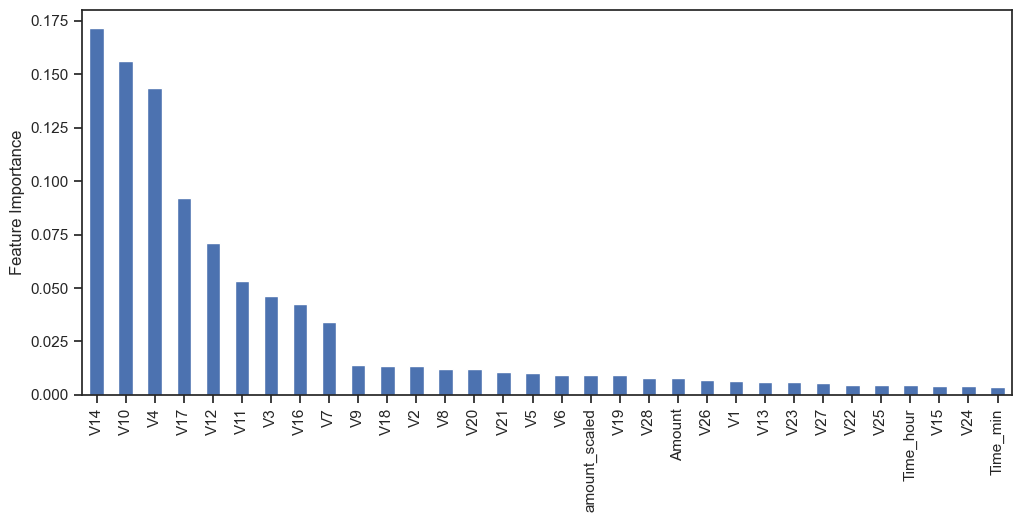

In [30]:
feature_importances = pd.Series(importances, index=X_train.columns)
fig, ax = plt.subplots(figsize=(12, 5))
feature_importances.sort_values(ascending=False).plot.bar(ax=ax)
ax.set_ylabel("Feature Importance")
plt.show()

# Model Selection and Model Training

As we have a classification problem on our hands we will apply classification models and calculate the cross validation score to identify the best fit for our data.

Some of the models that we are going to use are.

1.LogisticRegression


2.DecisionTreeClassifier


3.RandomForestClassifier


4.XGBoost


### Logistic Regression Model

In [31]:
lr = LogisticRegression(class_weight='balanced',max_iter=200, random_state=123)
lr.fit(X_train,y_train)

LogisticRegression(class_weight='balanced', max_iter=200, random_state=123)

In [32]:
pred_train = lr.predict(X_train)
pred = lr.predict(X_test)
    

In [33]:
matrix = confusion_matrix(y_test, pred)
matrix

array([[55165,  1486],
       [   11,    84]], dtype=int64)

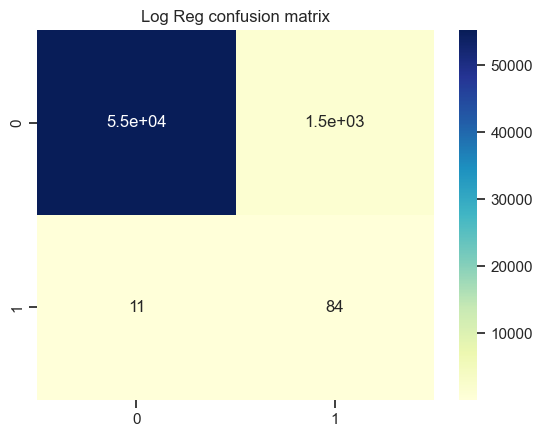

In [130]:
sns.heatmap(data=matrix, annot=True ,cmap="YlGnBu") 
plt.title('Log Reg confusion matrix')
plt.show() 

In [35]:
models_results = pd.DataFrame(columns=['Recall', 'Precision', 'F1', 'AUC'])

In [36]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, accuracy_score
from sklearn import metrics
from imblearn.pipeline import Pipeline, make_pipeline

In [134]:
def model_eval(y_test, predicted):
        
    accuracy = accuracy_score(y_test, predicted)*100
    precision = precision_score(y_test, predicted)*100
    recall = recall_score(y_test, predicted)*100
    f1 = f1_score(y_test, predicted)
    confusion_matrix =metrics.confusion_matrix(y_test, predicted)
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=[False, True])
    cm_display.plot()
    plt.grid(False)
    plt.show()
    
    auc = np.NaN
    if auc:
        auc = metrics.roc_auc_score(y_test, predicted )*100
        fpr, tpr, threshold = roc_curve(y_test, predicted)
        plt.plot(fpr, tpr, label='Model', c='blue')
        plt.plot([0, 1], [0, 1], linestyle='--', c='yellow')
        plt.title("ROC Curve")
        plt.legend()
        plt.show()

    print('Accuracy:',accuracy  )
    print('Precision:', precision )
    print('Recall:', recall)
    print('F1 Score:', f1)
    print('AUC:', auc)
    print('Classification Report:',classification_report)
    
    return [recall, precision, f1, auc]

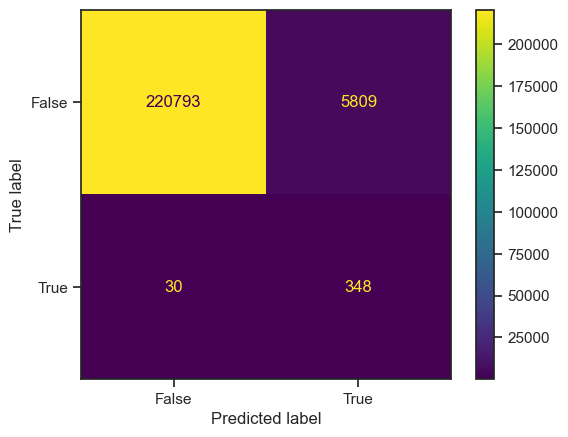

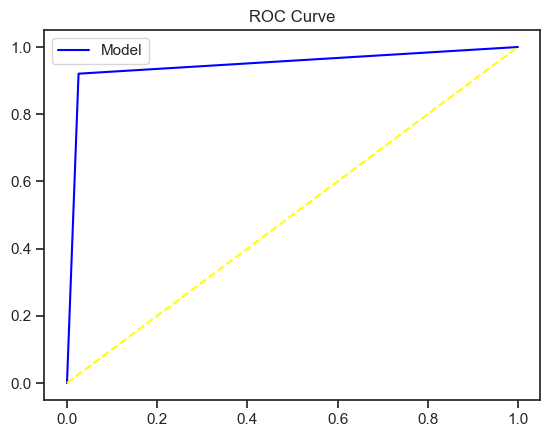

Accuracy: 97.42752665433078
Precision: 5.652103297060257
Recall: 92.06349206349206
F1 Score: 0.10650344299923489
AUC: 94.74998329355307
Classification Report: <function classification_report at 0x000002ADAE9F4E00>


[92.06349206349206, 5.652103297060257, 0.10650344299923489, 94.74998329355307]

In [135]:

model_eval(y_train,pred_train)

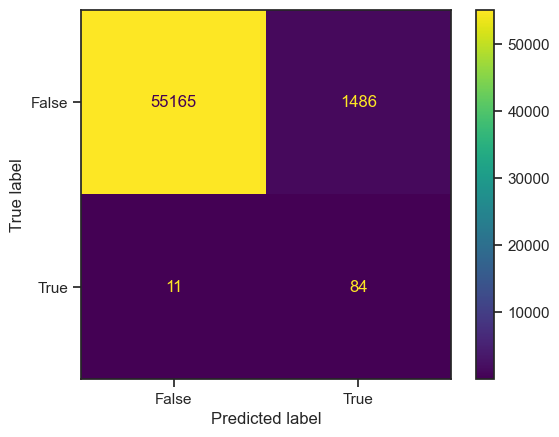

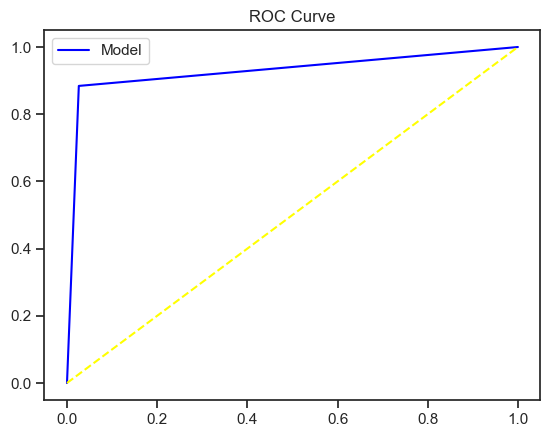

Accuracy: 97.36192859408592
Precision: 5.35031847133758
Recall: 88.42105263157895
F1 Score: 0.1009009009009009
AUC: 92.89898724322236
Classification Report: <function classification_report at 0x000002ADAE9F4E00>


[88.42105263157895, 5.35031847133758, 0.1009009009009009, 92.89898724322236]

In [39]:
model_eval(y_test, pred)

### Hyperparameter Tuning 

Hyperparameters are the parameters that need to be set before training the machine
learning model. The values of these hyperparameters cannot be altered after the model has been
trained. They play a vital role in the performance of the model.

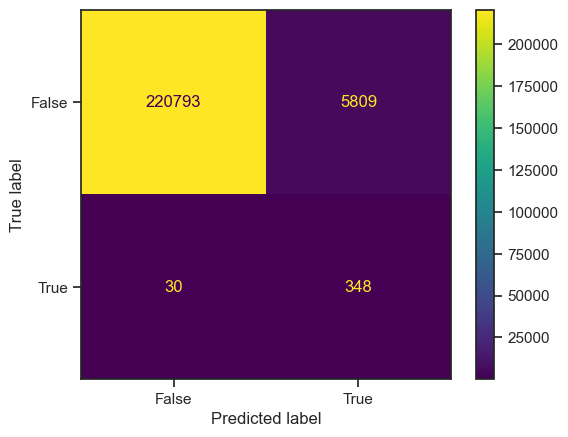

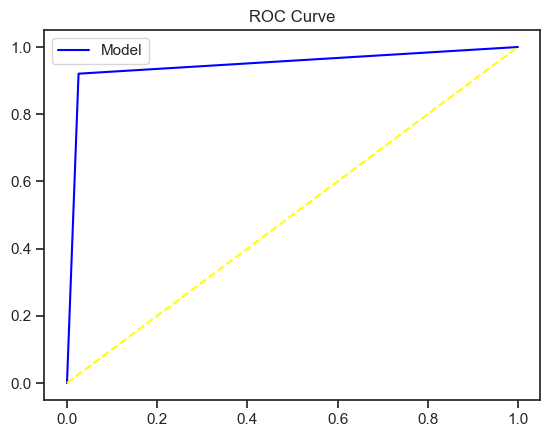

Accuracy: 97.42752665433078
Precision: 5.652103297060257
Recall: 92.06349206349206
F1 Score: 0.10650344299923489
AUC: 94.74998329355307
Classification Report: <function classification_report at 0x000002ADAE9F4E00>


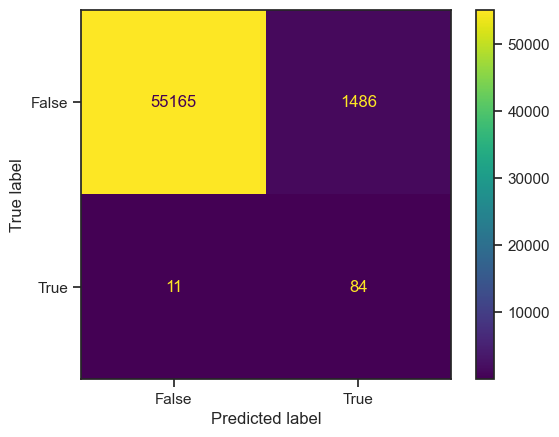

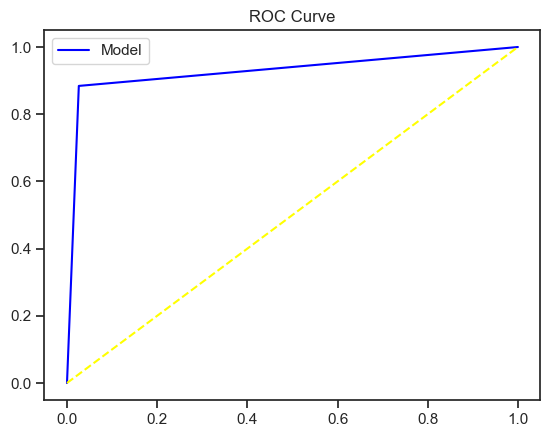

Accuracy: 97.36192859408592
Precision: 5.35031847133758
Recall: 88.42105263157895
F1 Score: 0.1009009009009009
AUC: 92.89898724322236
Classification Report: <function classification_report at 0x000002ADAE9F4E00>
Best parameters:  {'C': 1}


In [96]:
#Hyperparameter Tuning of LogicalRegression Model
param_grid = {'C' : [0.1, 1, 10, 100]}

lrclf = LogisticRegression(class_weight='balanced', max_iter=200, random_state=123, n_jobs=-1)
lrsearch = GridSearchCV(lrclf, param_grid, cv=5, scoring='recall')
lrsearch.fit(X_train, y_train)
lrpred_train = lrsearch.predict(X_train)
lrpred = lrsearch.predict(X_test)
model_eval(y_train,lrpred_train)
model_eval(y_test, lrpred)
print('Best parameters: ', search.best_params_)

In [97]:
matrix_gslog= confusion_matrix(y_test, lrpred)
matrix_gslog

array([[55165,  1486],
       [   11,    84]], dtype=int64)

### Observations

Logistic Regression Model with hyperparameter tuning gives an accuracy of 98.07%. 





Lets see tree-based models.

### Decision Tree Model

In [42]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [43]:
pred_train_dt = dt.predict(X_train)
pred_dt = dt.predict(X_test)


In [44]:
matrix_dt = confusion_matrix(y_test, pred_dt)
matrix_dt

array([[56619,    32],
       [   25,    70]], dtype=int64)

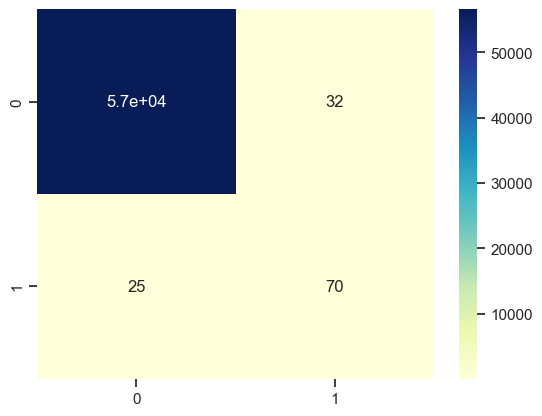

In [45]:
sns.heatmap(matrix_dt, annot=True , cmap="YlGnBu")
plt.show() 

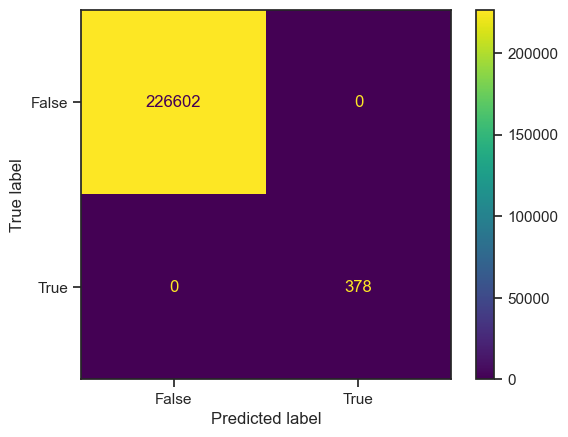

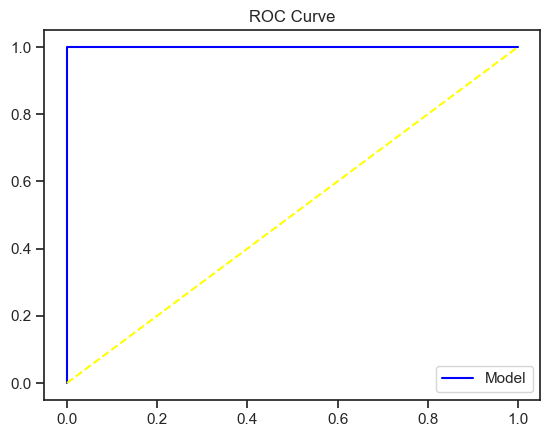

Accuracy: 100.0
Precision: 100.0
Recall: 100.0
F1 Score: 1.0
AUC: 100.0
Classification Report: <function classification_report at 0x000002ADAE9F4E00>


[100.0, 100.0, 1.0, 100.0]

In [46]:
model_eval(y_train,pred_train_dt )

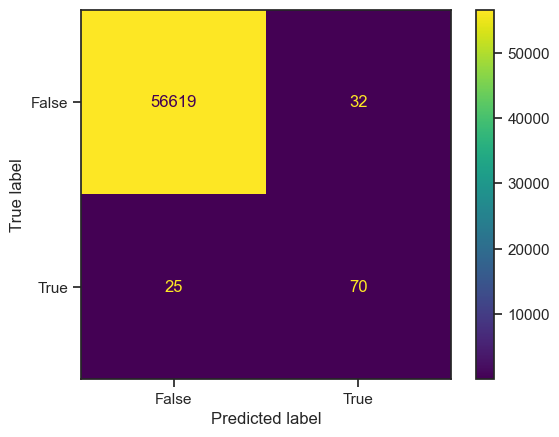

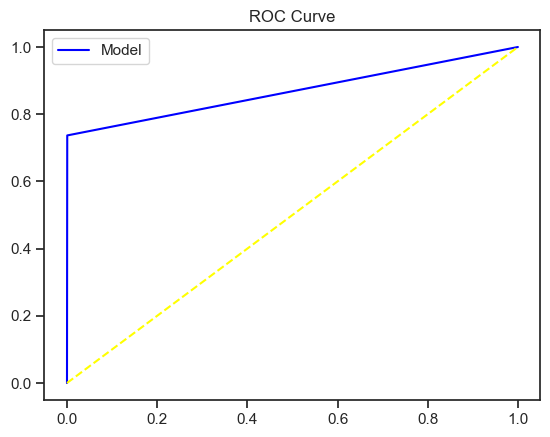

Accuracy: 99.89955239135799
Precision: 68.62745098039215
Recall: 73.68421052631578
F1 Score: 0.7106598984771574
AUC: 86.81386216065309
Classification Report: <function classification_report at 0x000002ADAE9F4E00>


[73.68421052631578, 68.62745098039215, 0.7106598984771574, 86.81386216065309]

In [47]:
model_eval(y_test,pred_dt)

In [48]:
from sklearn.model_selection import GridSearchCV
parameters = {
    'max_depth': [1,2,3,4,5],
   'min_samples_split' : [10,20,30]    
}
grid_search_dt = GridSearchCV(estimator = dt,
                             param_grid = parameters,
                             scoring = 'accuracy',
                             cv = 10,
                             n_jobs = -1)
grid_search_dt = grid_search_dt.fit(X_train,y_train)
best_accuracy = grid_search_dt.best_score_
best_parameters = grid_search_dt.best_params_

In [49]:
best_parameters

{'max_depth': 5, 'min_samples_split': 10}

In [50]:
pred_gstrain_dt = grid_search_dt.predict(X_train)
pred_gstest_dt = grid_search_dt.predict(X_test)

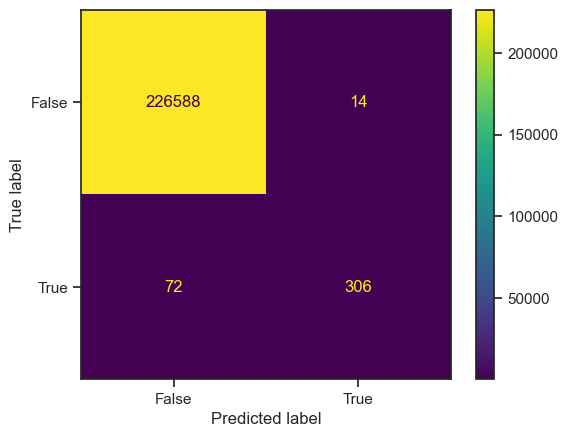

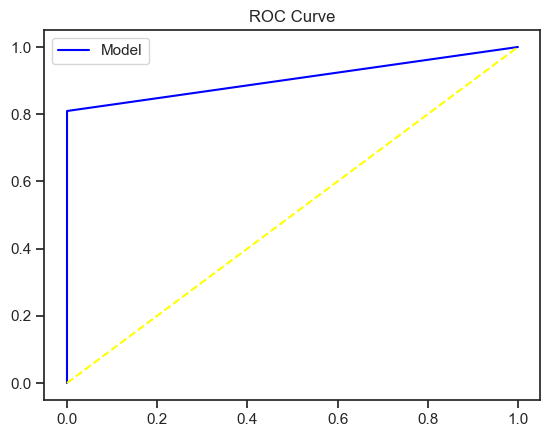

Accuracy: 99.96211119922461
Precision: 95.625
Recall: 80.95238095238095
F1 Score: 0.8767908309455588
AUC: 90.47310135958956
Classification Report: <function classification_report at 0x000002ADAE9F4E00>


[80.95238095238095, 95.625, 0.8767908309455588, 90.47310135958956]

In [51]:
model_eval(y_train, pred_gstrain_dt)

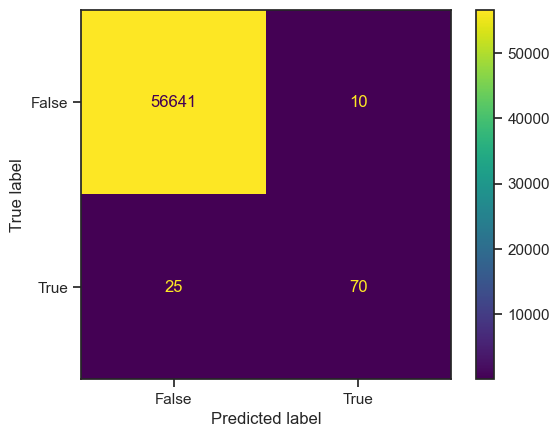

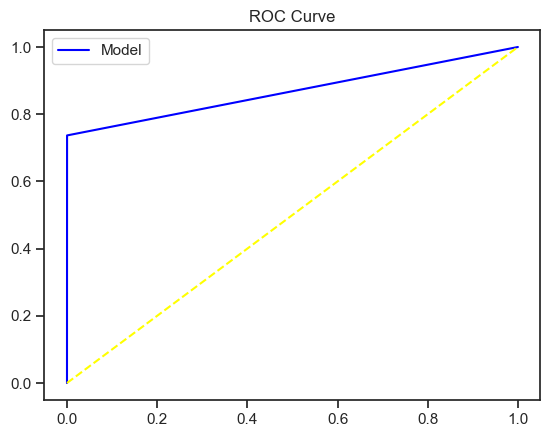

Accuracy: 99.93832164381631
Precision: 87.5
Recall: 73.68421052631578
F1 Score: 0.7999999999999999
AUC: 86.83327929362513
Classification Report: <function classification_report at 0x000002ADAE9F4E00>


[73.68421052631578, 87.5, 0.7999999999999999, 86.83327929362513]

In [52]:
model_eval(y_test,pred_gstest_dt)

In [53]:
matrix_gs_dt = confusion_matrix(y_test, pred_gstest_dt)
matrix_gs_dt

array([[56641,    10],
       [   25,    70]], dtype=int64)

### Observations


Our Decision Tree Model is giving 99.94% Accuracy. Hyperparameter Tuning for Decision Tree increased the Accuracy of 99.95%.

Obtained 89.6% precision,80.15% recall and 84.44% f1 score

### Random Forest

In [54]:
from sklearn.ensemble import RandomForestClassifier

In [55]:
rf = RandomForestClassifier(max_depth=110, min_samples_split=10, random_state = 123, n_jobs=-1)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=110, min_samples_split=10, n_jobs=-1,
                       random_state=123)

In [56]:
pred_train_rf = rf.predict(X_train)
pred_rf = rf.predict(X_test)

In [57]:
matrix_rf = confusion_matrix(y_test, pred_rf)
matrix_rf

array([[56644,     7],
       [   24,    71]], dtype=int64)

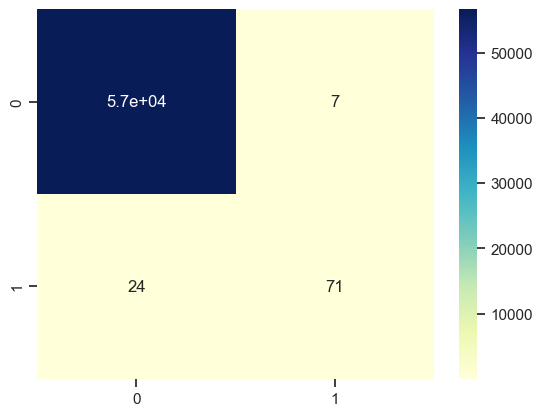

In [58]:
sns.heatmap(data=matrix_rf, annot=True , cmap="YlGnBu")
plt.show() 

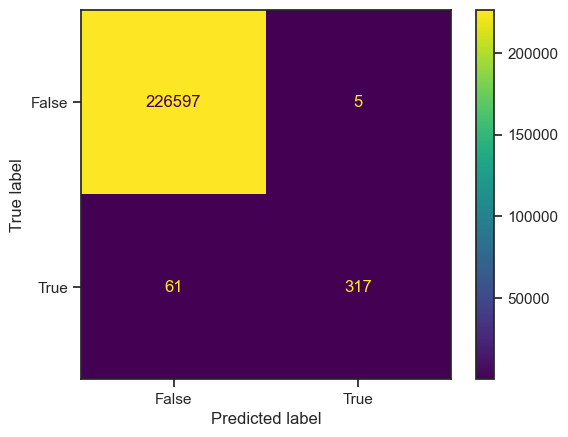

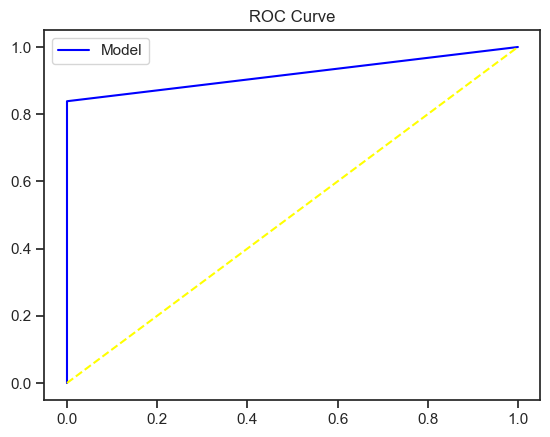

Accuracy: 99.97092254824213
Precision: 98.4472049689441
Recall: 83.86243386243386
F1 Score: 0.9057142857142857
AUC: 91.93011367528804
Classification Report: <function classification_report at 0x000002ADAE9F4E00>


[83.86243386243386, 98.4472049689441, 0.9057142857142857, 91.93011367528804]

In [59]:
model_eval(y_train, pred_train_rf)

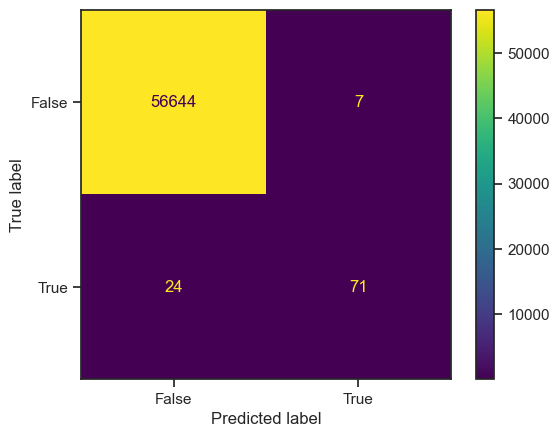

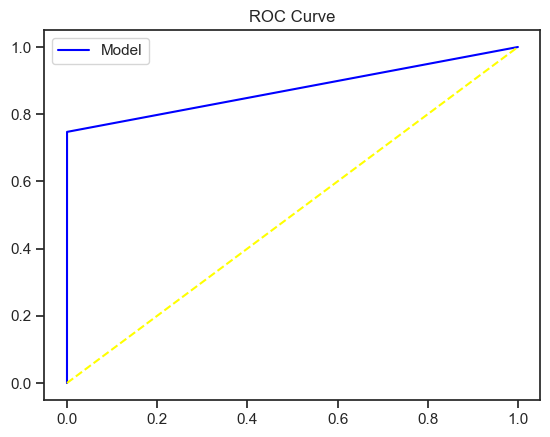

Accuracy: 99.94537059880872
Precision: 91.02564102564102
Recall: 74.73684210526315
F1 Score: 0.8208092485549133
AUC: 87.36224287395866
Classification Report: <function classification_report at 0x000002ADAE9F4E00>


[74.73684210526315, 91.02564102564102, 0.8208092485549133, 87.36224287395866]

In [60]:
model_eval(y_test, pred_rf)

In [61]:
from sklearn.model_selection import GridSearchCV
parameters = {
             'max_depth': [1,2,3,4,5],
             'min_samples_split' : [10,20,30]    
}
grid_search_rf = GridSearchCV(estimator = rf,
                             param_grid = parameters,
                             scoring = 'accuracy',
                             cv = 10,
                             n_jobs = -1)
grid_search_rf = grid_search_rf.fit(X_train,y_train)
best_accuracy = grid_search_rf.best_score_
best_parameters = grid_search_rf.best_params_

In [62]:
pred_gstrain_rf =grid_search_rf.predict(X_train)
pred_gstest_rf = grid_search_rf.predict(X_test)

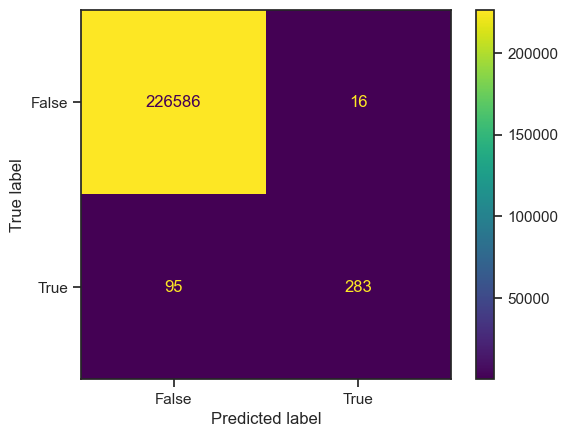

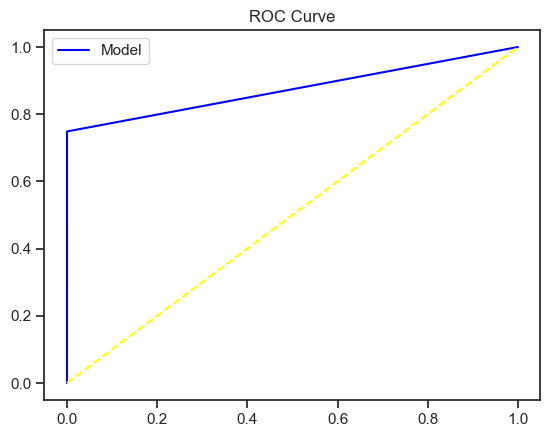

Accuracy: 99.95109701295269
Precision: 94.64882943143813
Recall: 74.86772486772487
F1 Score: 0.8360413589364845
AUC: 87.43033201488998
Classification Report: <function classification_report at 0x000002ADAE9F4E00>


[74.86772486772487, 94.64882943143813, 0.8360413589364845, 87.43033201488998]

In [63]:
model_eval(y_train, pred_gstrain_rf)

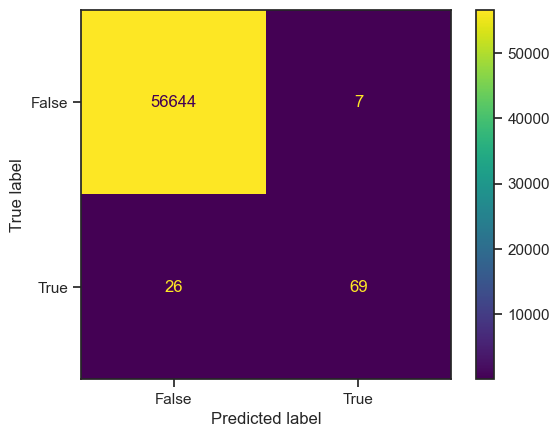

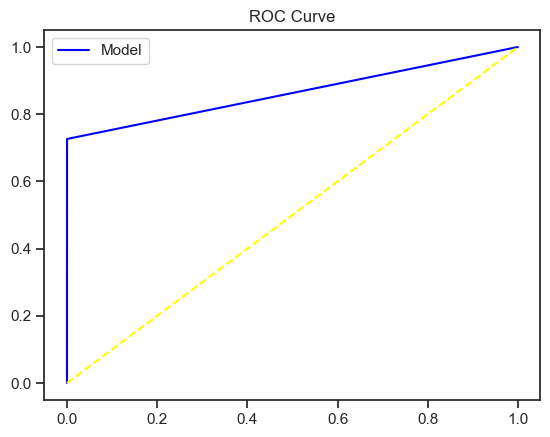

Accuracy: 99.94184612131252
Precision: 90.78947368421053
Recall: 72.63157894736842
F1 Score: 0.8070175438596492
AUC: 86.30961129501128
Classification Report: <function classification_report at 0x000002ADAE9F4E00>


[72.63157894736842, 90.78947368421053, 0.8070175438596492, 86.30961129501128]

In [64]:
model_eval(y_test, pred_gstest_rf)

In [65]:
matrix_gs_rf = confusion_matrix(y_test, pred_gstest_dt)
matrix_gs_rf

array([[56641,    10],
       [   25,    70]], dtype=int64)

Random Forest Classifier gives an accuracy of 99.96%. after hyperparameyer Tuning .

Obtained 91.46% precision, 78% recall and 84% f1 score and 90% AOC score.

### XG Boost

In [66]:
import sys
!{sys.executable} -m pip install xgboost

In [67]:
import xgboost as xgb

In [68]:

xgclf =xgb.XGBRFClassifier()
xgclf.fit(X_train,y_train)



XGBRFClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bytree=None, device=None,
                early_stopping_rounds=None, enable_categorical=False,
                eval_metric=None, feature_types=None, gamma=None,
                grow_policy=None, importance_type=None,
                interaction_constraints=None, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=None, max_leaves=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                multi_strategy=None, n_estimators=None, n_jobs=None,
                num_parallel_tree=None, objective='binary:logistic',
                random_state=None, reg_alpha=None, ...)

In [69]:
pred_train_xgb = xgclf.predict(X_train)
pred_xgb = xgclf.predict(X_test)

In [70]:
matrix_xgb = confusion_matrix(y_test,pred_xgb)
matrix_xgb

array([[56633,    18],
       [   20,    75]], dtype=int64)

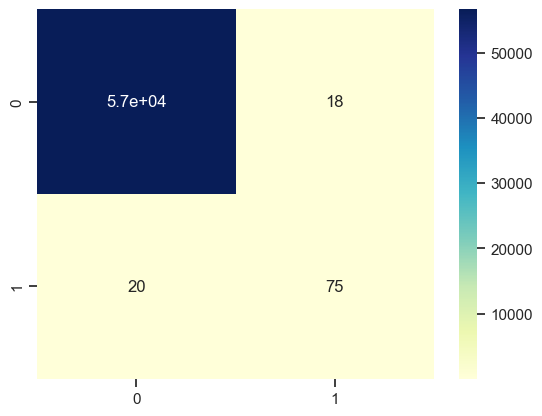

In [71]:
sns.heatmap(data=matrix_xgb, annot=True , cmap="YlGnBu")
plt.show() 

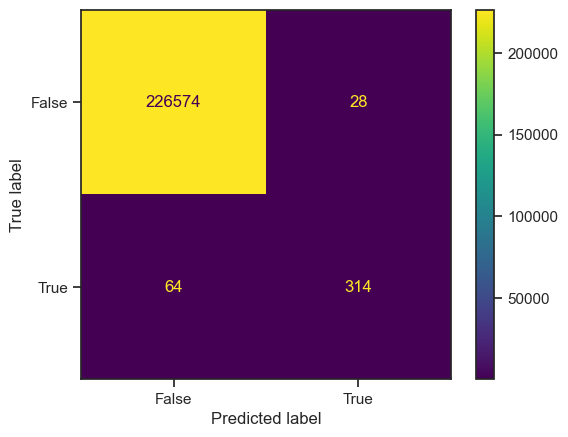

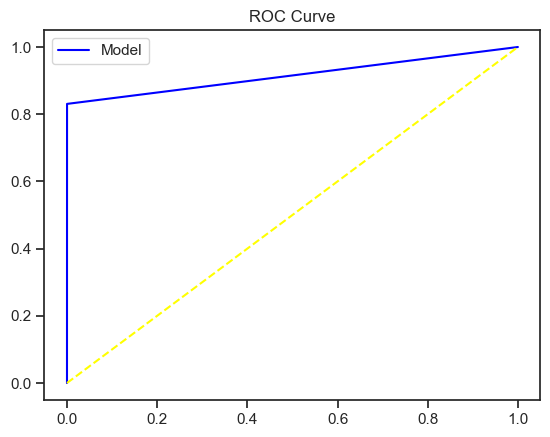

Accuracy: 99.95946779451934
Precision: 91.81286549707602
Recall: 83.06878306878306
F1 Score: 0.8722222222222223
AUC: 91.52821330118971
Classification Report: <function classification_report at 0x000002ADAE9F4E00>


[83.06878306878306, 91.81286549707602, 0.8722222222222223, 91.52821330118971]

In [72]:
model_eval(y_train,pred_train_xgb)

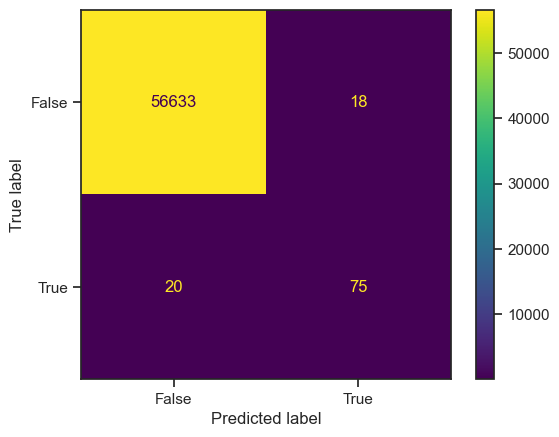

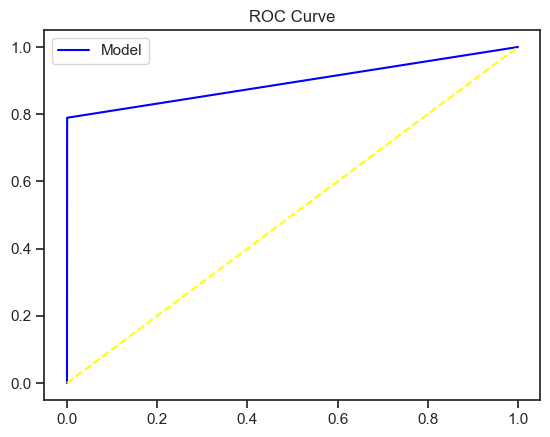

Accuracy: 99.93303492757198
Precision: 80.64516129032258
Recall: 78.94736842105263
F1 Score: 0.7978723404255319
AUC: 89.45779746536736
Classification Report: <function classification_report at 0x000002ADAE9F4E00>


[78.94736842105263, 80.64516129032258, 0.7978723404255319, 89.45779746536736]

In [73]:
model_eval(y_test,pred_xgb)

XG Boost Classifier gives 99. 94% Accuracy

#### Hyperparameter Tuning

In [74]:
#Use gridsearch for best parameters
from sklearn.model_selection import RandomizedSearchCV

In [75]:
param_dist_xgb = {
    'n_estimators': [50,100,150,200,300,400],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'max_depth': [3, 4, 5, 6]
}

In [76]:
gs = RandomizedSearchCV(xgclf,param_dist_xgb,verbose = 2)

In [77]:
gs.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END ...learning_rate=0.1, max_depth=6, n_estimators=100; total time=   5.2s
[CV] END ...learning_rate=0.1, max_depth=6, n_estimators=100; total time=   3.6s
[CV] END ...learning_rate=0.1, max_depth=6, n_estimators=100; total time=   3.7s
[CV] END ...learning_rate=0.1, max_depth=6, n_estimators=100; total time=   3.0s
[CV] END ...learning_rate=0.1, max_depth=6, n_estimators=100; total time=   3.0s
[CV] END ...learning_rate=0.1, max_depth=5, n_estimators=200; total time=   5.8s
[CV] END ...learning_rate=0.1, max_depth=5, n_estimators=200; total time=   6.2s
[CV] END ...learning_rate=0.1, max_depth=5, n_estimators=200; total time=   5.6s
[CV] END ...learning_rate=0.1, max_depth=5, n_estimators=200; total time=   5.1s
[CV] END ...learning_rate=0.1, max_depth=5, n_estimators=200; total time=   5.2s
[CV] END ..learning_rate=0.01, max_depth=5, n_estimators=400; total time=  11.4s
[CV] END ..learning_rate=0.01, max_depth=5, n_es

RandomizedSearchCV(estimator=XGBRFClassifier(base_score=None, booster=None,
                                             callbacks=None,
                                             colsample_bylevel=None,
                                             colsample_bytree=None, device=None,
                                             early_stopping_rounds=None,
                                             enable_categorical=False,
                                             eval_metric=None,
                                             feature_types=None, gamma=None,
                                             grow_policy=None,
                                             importance_type=None,
                                             interaction_constraints=None,
                                             max_bin=None,
                                             max_cat_threshold=None,
                                             ma...
                                             max_depth=None, max_leaves=None,
                                             min_child_weight=None, missing=nan,
                                             monotone_constraints=None,
                                             multi_strategy=None,
                                             n_estimators=None, n_jobs=None,
                                             num_parallel_tree=None,
                                             objective='binary:logistic',
                                             random_state=None, reg_alpha=None, ...),
                   param_distributions={'learning_rate': [0.01, 0.1, 0.2, 0.3],
                                        'max_depth': [3, 4, 5, 6],
                                        'n_estimators': [50, 100, 150, 200, 300,
                                                         400]},
                   verbose=2)

In [78]:
#Best Hyper paramters for XG Boost
print('Best Parameters for XG Boost :',gs.best_params_)

Best Parameters for XG Boost : {'n_estimators': 300, 'max_depth': 6, 'learning_rate': 0.3}


In [79]:
pred_train_xgb_hpt = gs.predict(X_train)
preds_xgb_hpt = gs.predict(X_test)

In [80]:
matrix_xgb_hpt = confusion_matrix(y_test,preds_xgb_hpt)
matrix_xgb_hpt

array([[56644,     7],
       [   33,    62]], dtype=int64)

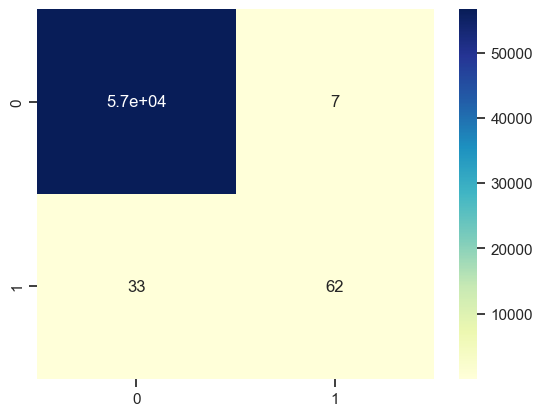

In [81]:
sns.heatmap(data=matrix_xgb_hpt, annot=True , cmap="YlGnBu")
plt.show() 

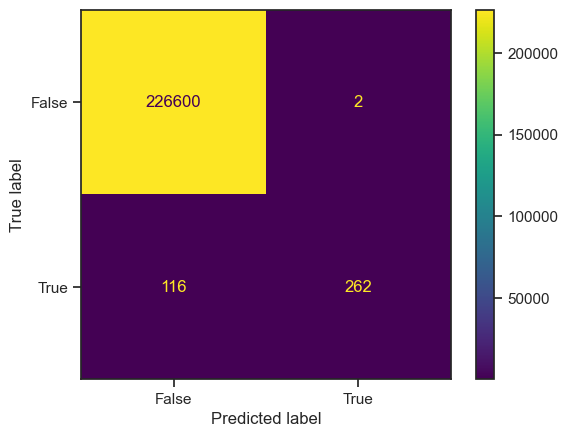

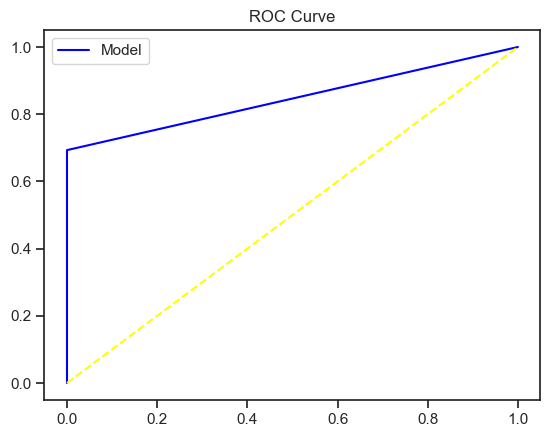

Accuracy: 99.94801304079655
Precision: 99.24242424242425
Recall: 69.31216931216932
F1 Score: 0.8161993769470405
AUC: 84.65564335371309
Classification Report: <function classification_report at 0x000002ADAE9F4E00>


[69.31216931216932, 99.24242424242425, 0.8161993769470405, 84.65564335371309]

In [82]:
model_eval(y_train,pred_train_xgb_hpt)

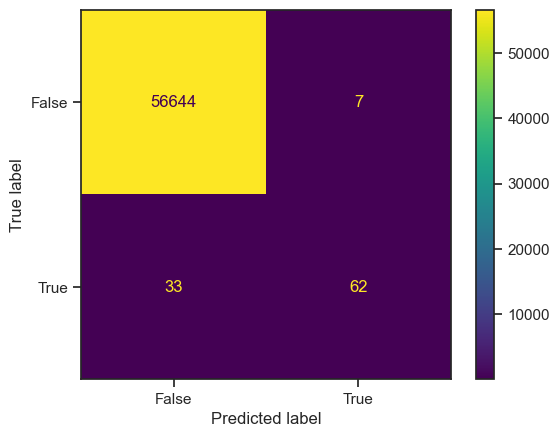

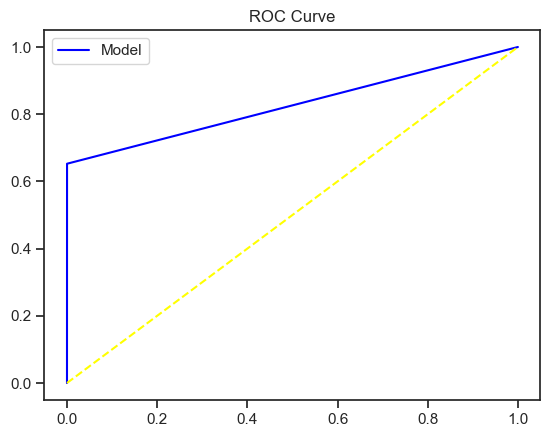

Accuracy: 99.92951045007578
Precision: 89.85507246376811
Recall: 65.26315789473685
F1 Score: 0.7560975609756099
AUC: 82.6254007686955
Classification Report: <function classification_report at 0x000002ADAE9F4E00>


[65.26315789473685, 89.85507246376811, 0.7560975609756099, 82.6254007686955]

In [83]:
model_eval(y_test,preds_xgb_hpt)

XG Boosting with hyper parameter tuning gives 99.94% Accuracy

## Model Evaluation
Now we have our best set models, now we move onto testing them on different metrices so as to know which one works best overall for us.

1. LogisticRegression
2. Logical Regression with hyperparameter Tuning
3. Decision Tree 
4. Decision Tree with hyperparameter Tuning
5. Random Forest
6. Random Forest with hyperparameter Tuning
7. XG Boost
8. XG Boost with hyperparmeter Tuning


we'll evaluate model using:

ROC AUC Score

ROC Curve

Confusion Matrix

Classification report



In [84]:
from sklearn.metrics import roc_auc_score

print('Logistic Regression: ', roc_auc_score(y_test,pred))
print('Logistic Regression_GridSearchCV: ', roc_auc_score(y_test,lrpred))
print('Decision Tree Classifier: ', roc_auc_score(y_test, pred_dt))
print('Decision Tree Classifier_GridSearchCV: ', roc_auc_score(y_test, pred_gstest_dt))
print('Random Forest Classifier: ', roc_auc_score(y_test, pred_rf))
print('Random Forest Classifier_GridSearch_CV: ', roc_auc_score(y_test, pred_gstest_rf))
print('XG Boost Classifier: ', roc_auc_score(y_test, pred_xgb))
print('xgb_GridSearchCV: '), roc_auc_score(y_test,preds_xgb_hpt)

Logistic Regression:  0.9289898724322236
Logistic Regression_GridSearchCV:  0.9289898724322236
Decision Tree Classifier:  0.8681386216065309
Decision Tree Classifier_GridSearchCV:  0.8683327929362513
Random Forest Classifier:  0.8736224287395866
Random Forest Classifier_GridSearch_CV:  0.8630961129501128
XG Boost Classifier:  0.8945779746536736
xgb_GridSearchCV: 


(None, 0.826254007686955)

Logistic Regression Classifier has best roc_auc_score

In [85]:
#Evaluating using ROC Curve
log_fpr, log_tpr, log_threshold = roc_curve(y_test, pred)
log_gridsearch_fpr,log_gridsearch_tpr,log_gridsearch_threshold = roc_curve(y_test,lrpred)
dt_fpr, dt_tpr, dt_threshold = roc_curve(y_test, pred_dt)
dt_gridsearch_fpr, dt_gridsearch_tpr, dt_gridsearch_threshold = roc_curve(y_test, pred_gstest_dt)
rf_fpr, rf_tpr, rf_threshold = roc_curve(y_test, pred_rf)
rf_gridsearch_fpr, rf_gridsearch_tpr, rf_gridsearch_threshold = roc_curve(y_test, pred_gstest_rf)
xgb_fpr, xgb_tpr, xgb_threshold = roc_curve(y_test, pred_xgb)
gridsearch_fpr,gridsearch_tpr,gridsearch_threshhold = roc_curve(y_test,preds_xgb_hpt)

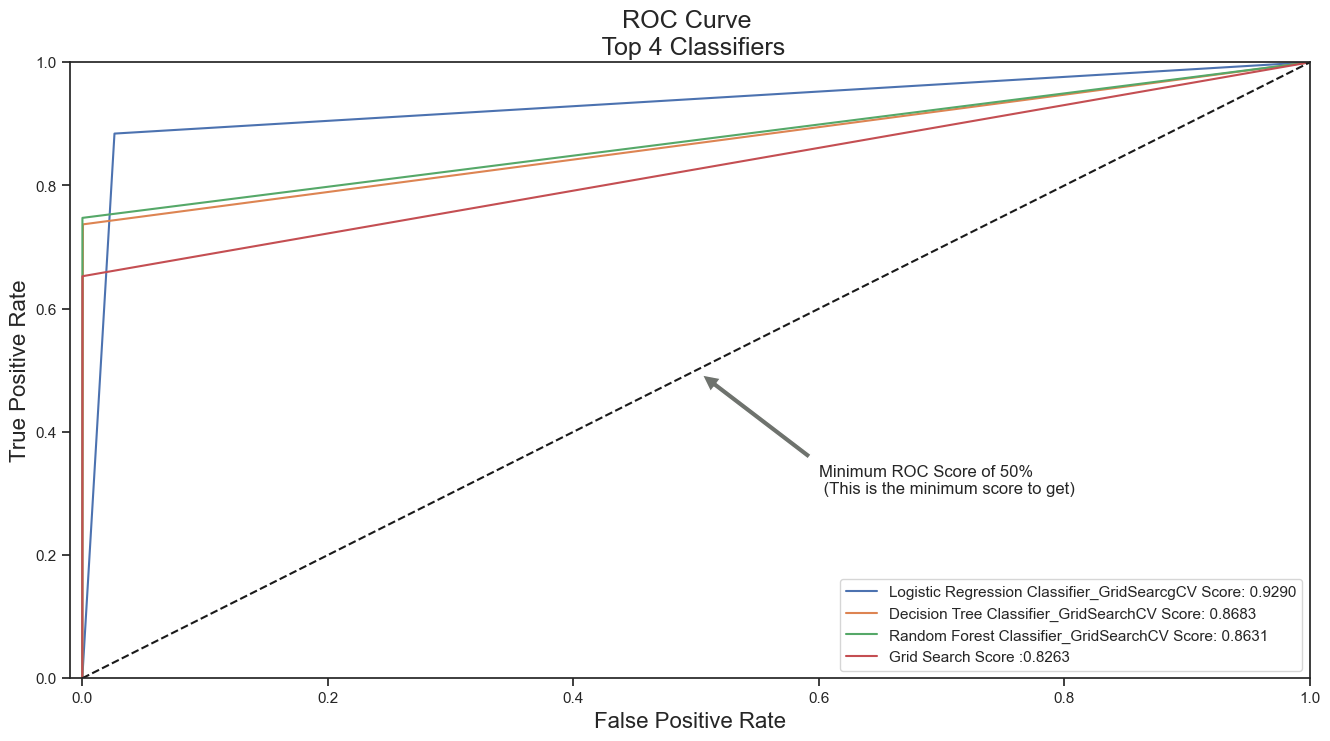

In [86]:
plt.figure(figsize=(16,8))
plt.title('ROC Curve \n Top 4 Classifiers', fontsize=18)
plt.plot(log_fpr, log_tpr, label='Logistic Regression Classifier_GridSearcgCV Score: {:.4f}'.format(roc_auc_score(y_test, lrpred)))
plt.plot(dt_fpr,dt_tpr, label='Decision Tree Classifier_GridSearchCV Score: {:.4f}'.format(roc_auc_score(y_test, pred_gstest_dt)))
plt.plot(rf_fpr, rf_tpr, label='Random Forest Classifier_GridSearchCV Score: {:.4f}'.format(roc_auc_score(y_test, pred_gstest_rf)))
plt.plot(gridsearch_fpr,gridsearch_tpr,label = 'Grid Search Score :{:.4f}'.format(roc_auc_score(y_test,preds_xgb_hpt)))
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([-0.01, 1, 0, 1])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05))
plt.legend()

Logistic Regression Classifier GridSearch  has best ROC Curve followed by Random Forest Classifier.

[Text(0, 0.5, ''), Text(0, 1.5, '')]

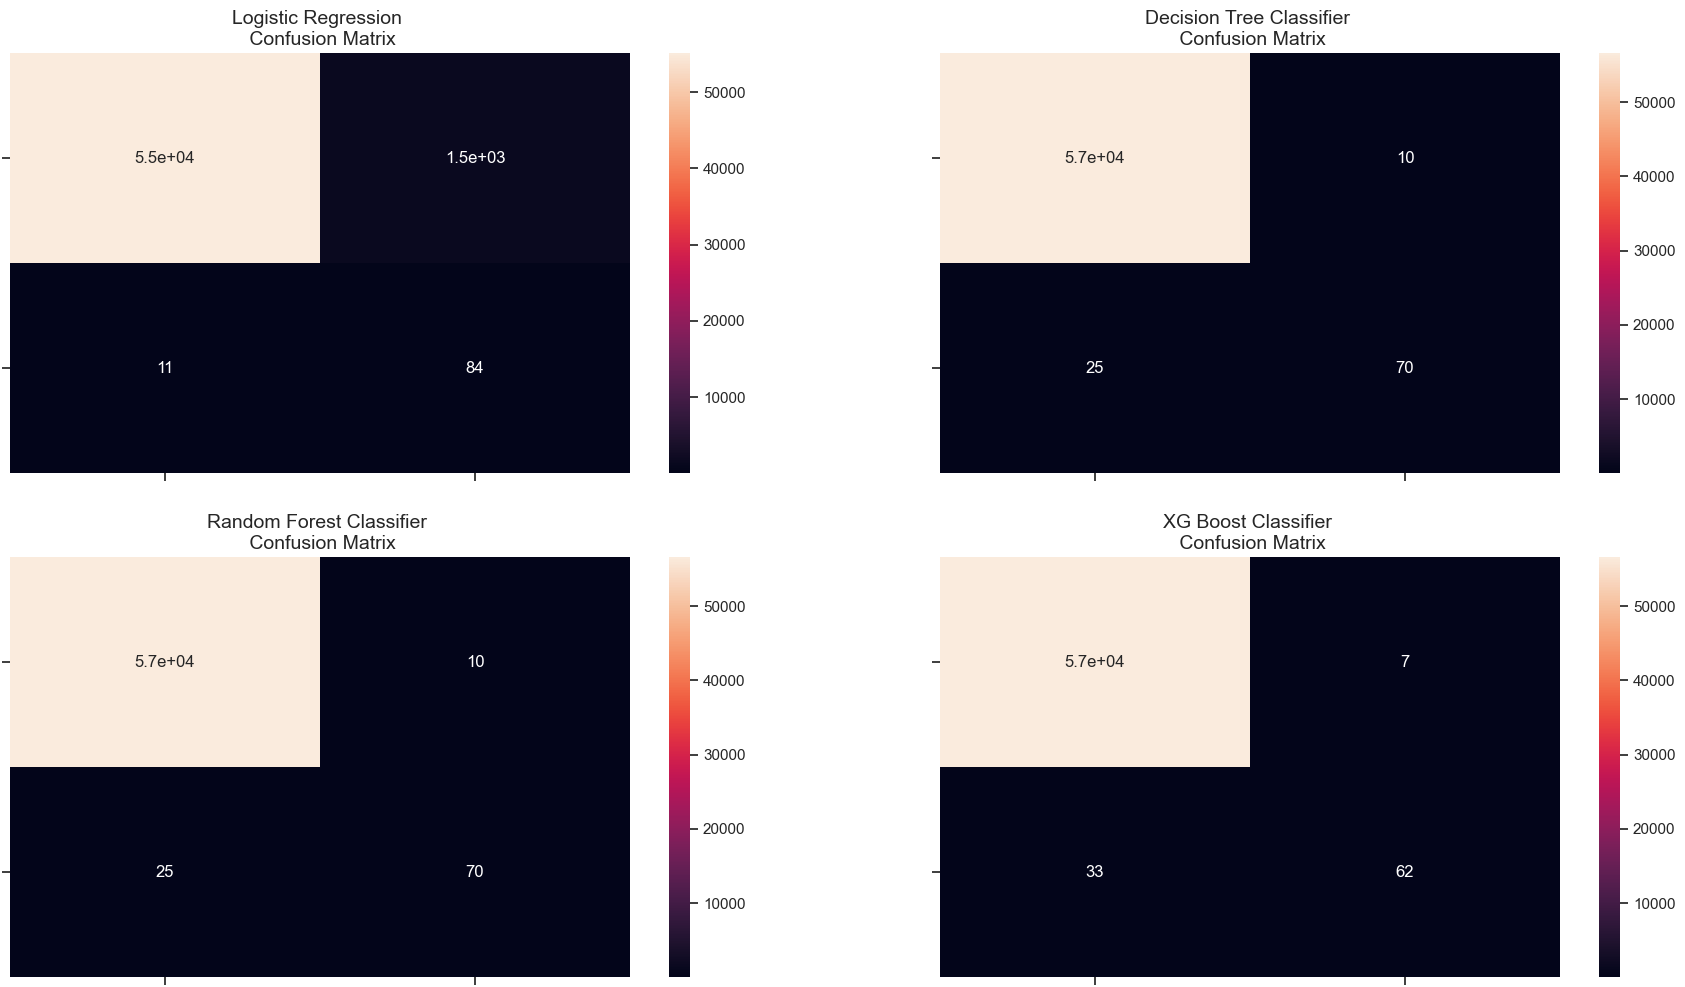

In [90]:
#Confusion Matrix

fig, ax = plt.subplots(2, 2,figsize=(22,12))

sns.heatmap(matrix_gslog, ax=ax[0][0], annot=True)
ax[0, 0].set_title("Logistic Regression \n Confusion Matrix", fontsize=14)
ax[0, 0].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[0, 0].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(matrix_gs_dt, ax=ax[0][1], annot=True)
ax[0][1].set_title("Decision Tree Classifier \n Confusion Matrix", fontsize=14)
ax[0][1].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[0][1].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(matrix_gs_rf, ax=ax[1][0], annot=True)
ax[1][0].set_title("Random Forest Classifier \n Confusion Matrix", fontsize=14)
ax[1][0].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[1][0].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(matrix_xgb_hpt, ax=ax[1][1], annot=True)
ax[1][1].set_title("XG Boost Classifier \n Confusion Matrix", fontsize=14)
ax[1][1].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[1][1].set_yticklabels(['', ''], fontsize=14, rotation=360)





From the Confusion Metrix, we can see that Logical Regression outperforms others followed by Random Forest and Decision Tree.

Logical Regression Model



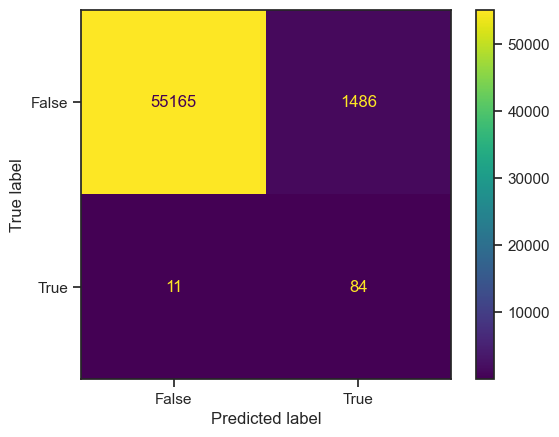

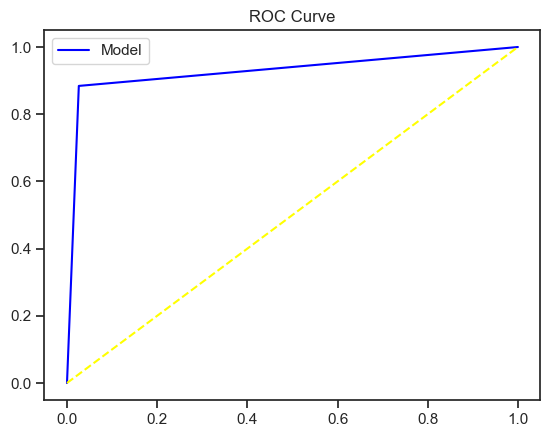

Accuracy: 97.36192859408592
Precision: 5.35031847133758
Recall: 88.42105263157895
F1 Score: 0.1009009009009009
AUC: 92.89898724322236
Classification Report: <function classification_report at 0x000002ADAE9F4E00>
Decision Tree Model



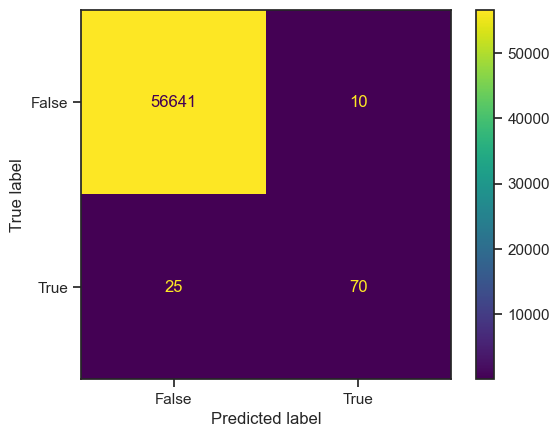

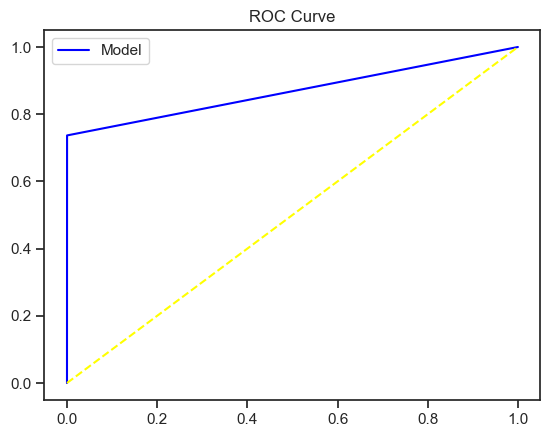

Accuracy: 99.93832164381631
Precision: 87.5
Recall: 73.68421052631578
F1 Score: 0.7999999999999999
AUC: 86.83327929362513
Classification Report: <function classification_report at 0x000002ADAE9F4E00>
Random Forest Model



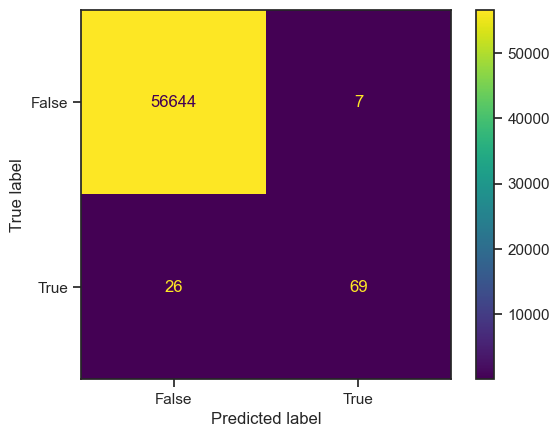

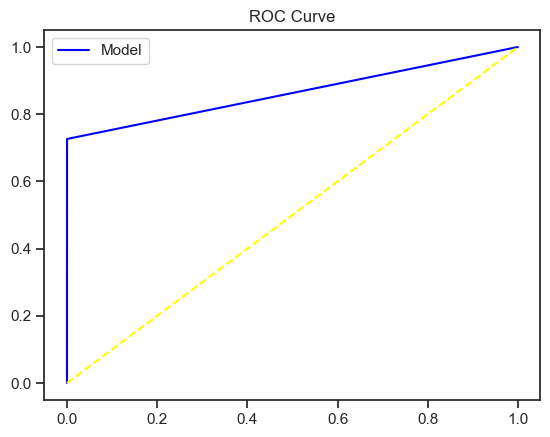

Accuracy: 99.94184612131252
Precision: 90.78947368421053
Recall: 72.63157894736842
F1 Score: 0.8070175438596492
AUC: 86.30961129501128
Classification Report: <function classification_report at 0x000002ADAE9F4E00>
XG Boost Model



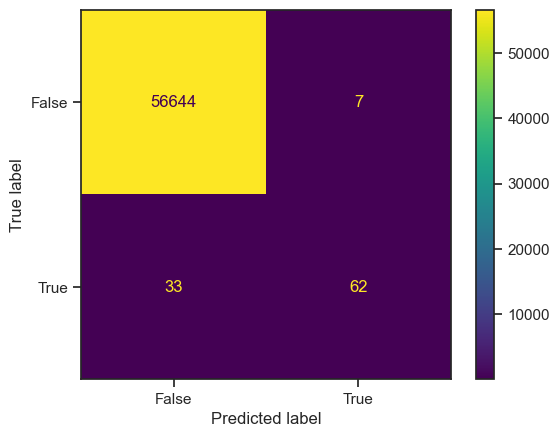

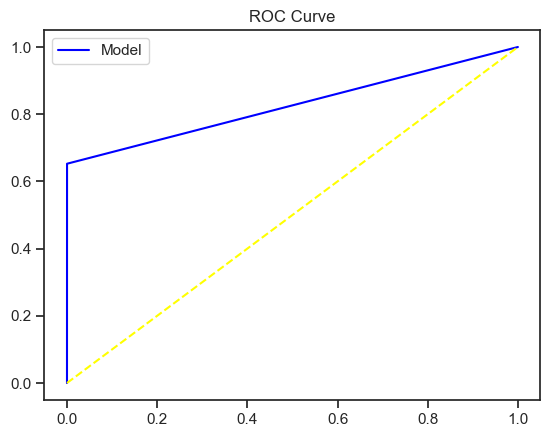

Accuracy: 99.92951045007578
Precision: 89.85507246376811
Recall: 65.26315789473685
F1 Score: 0.7560975609756099
AUC: 82.6254007686955
Classification Report: <function classification_report at 0x000002ADAE9F4E00>


(None,
 [65.26315789473685, 89.85507246376811, 0.7560975609756099, 82.6254007686955])

In [138]:
#Evaluation using classification report

Compare = print('Logical Regression Model\n'),model_eval(y_test,lrpred)
print('Decision Tree Model\n'),model_eval(y_test,pred_gstest_dt)
print('Random Forest Model\n'),model_eval(y_test,pred_gstest_rf)
print('XG Boost Model\n'),model_eval(y_test,preds_xgb_hpt)


In [94]:
acc_score = accuracy_score(y_test, lrpred)
print('Logistic Regression Model Accuracy is: ',round(acc_score * 100,2).astype(str) + '%')
acc_score = accuracy_score(y_test, pred_gstest_dt)
print('Decision Tree Model Accuracy is : ',round(acc_score * 100,2).astype(str) + '%')
acc_score = accuracy_score(y_test, pred_gstest_rf)
print('Random Forest Classifier Accuracy : ',round(acc_score * 100,2).astype(str) + '%')
acc_score = accuracy_score(y_test, preds_xgb_hpt)
print('XG Boost Model with hyper tuning : ',round(acc_score * 100,2).astype(str) + '%')



Logistic Regression Model Accuracy is:  97.36%
Decision Tree Model Accuracy is :  99.94%
Random Forest Classifier Accuracy :  99.94%
XG Boost Model with hyper tuning :  99.93%


Decision Tree and Random Forest Classifier gives a better accuracy score of 99.94%

## Conclusion

Exploratory Data analysis is done for different features.

Prepared Data and build different ML Models.

Evaluate different models performance  w.r.t  Accuracy,Precision,Recall and F1 Scores.

Random Forest with default parameters with hyperparameter tuning is giving best accuracy of 99.96% on test dataset.

Tried Boosting technique XGBoost and have a model with 99.95% accuracy with improvement in False Poitive and False Negative.

Then further tried doing hyper parameter tuning for XGBoost.

From all these models, Random Forest Model is the best Model for finding frauds in Credit Card with an Accuracy of 99.96% ,92% precision and 89% AUC score. 

### Model Serialisation

In [95]:
import pickle

In [101]:
with open('lrsearch.pickle','wb') as f1:
    pickle.dump(lrsearch,f1)

In [102]:
with open('lrsearch.pickle','rb') as f1:
    logreg = pickle.load(f1)

In [103]:
with open('grid_search_dt.pickle','wb') as f2:
    pickle.dump(grid_search_dt,f2)

In [104]:
with open('grid_search_dt.pickle','rb') as f2:
    decisiontree = pickle.load(f2)

In [105]:
with open('grid_search_rf.pickle','wb') as f3:
    pickle.dump(grid_search_rf,f3)

In [106]:
with open('grid_search_rf.pickle','rb') as f3:
    randomforest = pickle.load(f3)

In [107]:
with open('gs.pickle','wb') as f4:
    pickle.dump(gs,f4)

In [108]:
with open('gs.pickle','rb') as f4:
    xgb = pickle.load(f4)